# Exploración y Recolección de Datos con Joins en Fórmula 1

Este notebook está diseñado para una clase práctica en la que se exploran y recolectan datos mediante la unión (_joins_) de múltiples datasets de Fórmula 1. El objetivo es analizar conjuntamente información procedente de diferentes orígenes para responder preguntas de negocio y obtener insights sobre la historia de la F1.

## Objetivos de la Clase

1. Comprender el uso de joins para combinar tablas utilizando claves comunes (por ejemplo, `raceId` y `driverId`).
2. Explorar la integración de datos provenientes de archivos distintos y su impacto en la información resultante.
3. Responder a preguntas de negocio como:
   - ¿Cuántos pilotos han participado en la F1?
   - ¿Cuál es el circuito que ha sido más utilizado?
   - ¿Qué piloto ha ganado más carreras?
   - ¿Qué piloto ha acumulado más puntos durante su carrera?
4. Interpretar gráficamente resultados y tendencias a lo largo del tiempo.

La idea es que, mediante el uso de operaciones join, los estudiantes unan y analicen datos de varias fuentes (por ejemplo, `races.csv`, `results.csv` y `drivers.csv`) para elaborar un análisis exploratorio completo.

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
!unzip f1stasts_1.zip

--2025-04-24 19:11:34--  https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip [following]
--2025-04-24 19:11:35--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6183969 (5.9M) [application/zip]
Saving to: ‘f1stasts_1.zip.1’

f1stasts_1.zip.1    100%[===================>]   5.90M  --.-KB/s    in 0.09s   

2025-04-24 19:11:35 (66.3 MB/s) - ‘f1stasts_1.zip.1’ saved [6183969/618396

## 1. Carga y Exploración de los Datos

En esta sección se cargan y revisan brevemente los datasets principales:

- **races.csv:** Contiene detalles de cada carrera (año, circuito, fecha, etc.).
- **results.csv:** Registra los resultados de cada carrera (posición, puntos, vueltas, etc.).
- **drivers.csv:** Información sobre cada piloto (nombre, nacionalidad, fecha de nacimiento, etc.).

Asegúrate de tener estos archivos en tu entorno de trabajo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## 2. Análisis Preliminar y Preparación de los Datos

Antes de realizar las uniones, es importante revisar las columnas clave de cada DataFrame:

- En **races_df** utilizaremos `raceId` para identificar la carrera.
- En **results_df** también se emplea `raceId` y `driverId` para enlazar resultados y pilotos.
- En **drivers_df** `driverId` es la clave para identificar a cada piloto.

Realiza un análisis exploratorio básico (conteos, tipos de dato, detección de nulos) para asegurarte de la calidad de la información.

In [ ]:
race_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')

In [ ]:
race_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [ ]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


In [ ]:
race_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
race_df.isnull().sum()

,0
raceId,0
year,0
round,0
circuitId,0
name,0
date,0
time,0
url,0
fp1_date,0
fp1_time,0


In [ ]:
for col in race_df.columns:
  race_df.loc[race_df[col]=='\\N',col]= np.nan


In [ ]:
race_df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/di

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1.0,2009.0,1.0,1.0,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2009.0,2.0,2.0,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2009.0,3.0,17.0,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2009.0,4.0,3.0,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2009.0,5.0,4.0,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116.0,2023.0,18.0,69.0,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,NaN,NaN,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117.0,2023.0,19.0,32.0,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,NaN,NaN
1098,1118.0,2023.0,20.0,18.0,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,NaN,NaN,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119.0,2023.0,21.0,80.0,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,NaN,NaN


In [ ]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [ ]:
for col in results_df.columns:
  results_df.loc[results_df[col]=='\\N',col]= np.nan

results_df.isna().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number,6
grid,0
position,10873
positionText,0
positionOrder,0
points,0


In [ ]:
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1.0,18.0,1.0,1.0,22,1.0,1,1,1.0,10.0,58.0,1:34:50.616,5690616,39,2,1:27.452,218.300,1.0
1,2.0,18.0,2.0,2.0,3,5.0,2,2,2.0,8.0,58.0,+5.478,5696094,41,3,1:27.739,217.586,1.0
2,3.0,18.0,3.0,3.0,7,7.0,3,3,3.0,6.0,58.0,+8.163,5698779,41,5,1:28.090,216.719,1.0
3,4.0,18.0,4.0,4.0,5,11.0,4,4,4.0,5.0,58.0,+17.181,5707797,58,7,1:28.603,215.464,1.0
4,5.0,18.0,5.0,1.0,23,3.0,5,5,5.0,4.0,58.0,+18.014,5708630,43,1,1:27.418,218.385,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081.0,1110.0,817.0,213.0,3,19.0,16,16,16.0,0.0,44.0,+1:43.071,5053521,25,15,1:50.994,227.169,1.0
26076,26082.0,1110.0,858.0,3.0,2,18.0,17,17,17.0,0.0,44.0,+1:44.476,5054926,37,9,1:50.486,228.213,1.0
26077,26083.0,1110.0,807.0,210.0,27,0.0,18,18,18.0,0.0,44.0,+1:50.450,5060900,26,4,1:49.907,229.415,1.0
26078,26084.0,1110.0,832.0,6.0,55,4.0,NaN,R,19.0,0.0,23.0,NaN,NaN,9,19,1:53.138,222.864,130.0


In [ ]:
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1.0,18.0,1.0,1.0,22,1.0,1,1,1.0,10.0,58.0,1:34:50.616,5690616,39,2,1:27.452,218.300,1.0
1,2.0,18.0,2.0,2.0,3,5.0,2,2,2.0,8.0,58.0,+5.478,5696094,41,3,1:27.739,217.586,1.0
2,3.0,18.0,3.0,3.0,7,7.0,3,3,3.0,6.0,58.0,+8.163,5698779,41,5,1:28.090,216.719,1.0
3,4.0,18.0,4.0,4.0,5,11.0,4,4,4.0,5.0,58.0,+17.181,5707797,58,7,1:28.603,215.464,1.0
4,5.0,18.0,5.0,1.0,23,3.0,5,5,5.0,4.0,58.0,+18.014,5708630,43,1,1:27.418,218.385,1.0


In [ ]:
results_df.isnull().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number,6
grid,0
position,10873
positionText,0
positionOrder,0
points,0


In [ ]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [ ]:
for col in drivers_df.columns:
  drivers_df.loc[drivers_df[col]=='\\N',col]= np.nan

drivers_df.isna().sum()

,0
driverId,0
driverRef,0
number,803
code,757
forename,0
surname,0
dob,0
nationality,0
url,0


In [ ]:
drivers_df.isnull().sum()

,0
driverId,0
driverRef,0
number,803
code,757
forename,0
surname,0
dob,0
nationality,0
url,0


In [ ]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2.0,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3.0,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4.0,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5.0,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


## 3. Integración de Datos mediante Joins

El objetivo es unir la información de las distintas tablas para poder responder a preguntas de negocio. En este ejercicio central, se utilizarán joins para obtener insights combinando datos de carreras, resultados y pilotos.

### 3.1 Unir `results_df` y `drivers_df`

Para analizar la participación y resultados de cada piloto, realizamos un merge entre `results_df` y `drivers_df` utilizando la clave `driverId`.

**Pregunta clave:** ¿Cuántos pilotos distintos han participado en la F1?

Utiliza el DataFrame resultante para explorar esta pregunta.

In [ ]:
df_resultados = pd.merge(results_df,drivers_df,on='driverId',how="inner")
df_resultados

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1.0,18.0,1.0,1.0,22,1.0,1,1,1.0,10.0,...,218.300,1.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2.0,18.0,2.0,2.0,3,5.0,2,2,2.0,8.0,...,217.586,1.0,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3.0,18.0,3.0,3.0,7,7.0,3,3,3.0,6.0,...,216.719,1.0,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4.0,18.0,4.0,4.0,5,11.0,4,4,4.0,5.0,...,215.464,1.0,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5.0,18.0,5.0,1.0,23,3.0,5,5,5.0,4.0,...,218.385,1.0,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081.0,1110.0,817.0,213.0,3,19.0,16,16,16.0,0.0,...,227.169,1.0,ricciardo,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
26076,26082.0,1110.0,858.0,3.0,2,18.0,17,17,17.0,0.0,...,228.213,1.0,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
26077,26083.0,1110.0,807.0,210.0,27,0.0,18,18,18.0,0.0,...,229.415,1.0,hulkenberg,27,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
26078,26084.0,1110.0,832.0,6.0,55,4.0,NaN,R,19.0,0.0,...,222.864,130.0,sainz,55,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.


In [ ]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  float64
 1   raceId           26080 non-null  float64
 2   driverId         26080 non-null  float64
 3   constructorId    26080 non-null  float64
 4   number_x         26074 non-null  object 
 5   grid             26080 non-null  float64
 6   position         15207 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  float64
 9   points           26080 non-null  float64
 10  laps             26080 non-null  float64
 11  time             7251 non-null   object 
 12  milliseconds     7250 non-null   object 
 13  fastestLap       7615 non-null   object 
 14  rank             7831 non-null   object 
 15  fastestLapTime   7615 non-null   object 
 16  fastestLapSpeed  7615 non-null   object 
 17  statusId    

In [ ]:
num_drivers= df_resultados['driverId'].nunique()
print(f"El número de pilotos distintos en la F1 es de: {num_drivers}")

El número de pilotos distintos en la F1 es de: 857


### 3.2. Unir `df_resultados` con `races_df`

Ahora, para relacionar los resultados con cada carrera, se efectúa la unión entre el DataFrame obtenido (`df_resultados`) y `races_df` a través de la clave `raceId`.

**Pregunta clave:** ¿Qué información adicional sobre cada carrera (fecha, circuito, etc.) se puede incorporar para enriquecer el análisis?

Explora y analiza cómo afecta esta integración en el conjunto de datos final.

In [ ]:
df_completo = pd.merge(df_resultados,race_df,on='raceId',how="inner")
df_completo

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1.0,18.0,1.0,1.0,22,1.0,1,1,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,18.0,2.0,2.0,3,5.0,2,2,2.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,18.0,3.0,3.0,7,7.0,3,3,3.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,18.0,4.0,4.0,5,11.0,4,4,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,18.0,5.0,1.0,23,3.0,5,5,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081.0,1110.0,817.0,213.0,3,19.0,16,16,16.0,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00
26076,26082.0,1110.0,858.0,3.0,2,18.0,17,17,17.0,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00
26077,26083.0,1110.0,807.0,210.0,27,0.0,18,18,18.0,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00
26078,26084.0,1110.0,832.0,6.0,55,4.0,NaN,R,19.0,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00


In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  float64
 1   raceId           26080 non-null  float64
 2   driverId         26080 non-null  float64
 3   constructorId    26080 non-null  float64
 4   number_x         26074 non-null  object 
 5   grid             26080 non-null  float64
 6   position         15207 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  float64
 9   points           26080 non-null  float64
 10  laps             26080 non-null  float64
 11  time_x           7251 non-null   object 
 12  milliseconds     7250 non-null   object 
 13  fastestLap       7615 non-null   object 
 14  rank             7831 non-null   object 
 15  fastestLapTime   7615 non-null   object 
 16  fastestLapSpeed  7615 non-null   object 
 17  statusId    

Para enriquecer el Dataframe y ayudar a dar un mayor análisis, se agrego la siguiente información o datos como el año, la ronda del campeonato, el circuito, la fecha y la hora.

## 4. Análisis Conjunto y Ejercicios Interactivos

Con el DataFrame combinado (`df_completo`) podremos responder a varias preguntas de negocio y realizar análisis conjuntos. A continuación se proponen algunos ejercicios:

### Ejercicio 1: Identificar el Circuito Más Utilizado

Utiliza `races_df` y la información del DataFrame combinado para determinar cuál es el circuito (identificado con `circuitId` o el nombre del circuito, si se encuentra) que ha sido sede de la mayor cantidad de carreras.

**Sugerencia:** Usa la función `value_counts()` y discute el resultado con los estudiantes.

El circuito que ha sido sede de la mayor cantidad de carreras es el British Grand Prix

In [ ]:
circuit_counts = df_completo["name"].value_counts()
circuit_counts

,count
name,
British Grand Prix,1853
Italian Grand Prix,1824
Monaco Grand Prix,1644
German Grand Prix,1599
Belgian Grand Prix,1577
French Grand Prix,1484
Canadian Grand Prix,1271
Spanish Grand Prix,1256
Brazilian Grand Prix,1163


### Ejercicio 2: Piloto con Más Victorias

Filtra el DataFrame combinado para quedarte con aquellos registros donde la posición final (`position`) sea 1, lo que indica una victoria. Luego, agrupa por piloto para determinar quién ha ganado más carreras.

**Pregunta para los estudiantes:** _¿Qué piloto se destaca por su número de victorias y cómo se relaciona este dato con otros indicadores de rendimiento?_

In [ ]:
# Filtrar victorias (posición 1)
victorias_df = df_completo[df_completo['position'] == '1']
victorias_df

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1.0,18.0,1.0,1.0,22,1.0,1,1,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,23.0,19.0,8.0,6.0,1,2.0,1,1,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,45.0,20.0,13.0,6.0,2,2.0,1,1,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,67.0,21.0,8.0,6.0,1,1.0,1,1,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,89.0,22.0,13.0,6.0,2,1.0,1,1,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25980,25986.0,1106.0,830.0,9.0,1,1.0,1,1,1.0,25.0,...,2023-06-16,17:30:00,2023-06-16,21:00:00,2023-06-17,16:30:00,2023-06-17,20:00:00,NaN,NaN
26000,26006.0,1107.0,830.0,9.0,1,1.0,1,1,1.0,26.0,...,2023-06-30,11:30:00,2023-07-01,10:30:00,NaN,NaN,2023-06-30,15:00:00,2023-07-01,14:30:00
26020,26026.0,1108.0,830.0,9.0,1,1.0,1,1,1.0,26.0,...,2023-07-07,11:30:00,2023-07-07,15:00:00,2023-07-08,10:30:00,2023-07-08,14:00:00,NaN,NaN
26040,26046.0,1109.0,830.0,9.0,1,2.0,1,1,1.0,26.0,...,2023-07-21,11:30:00,2023-07-21,15:00:00,2023-07-22,10:30:00,2023-07-22,14:00:00,NaN,NaN


In [ ]:
piloto_victorias = victorias_df.groupby('driverRef')['position'].count().sort_values(ascending=False)
piloto_victorias

,position
driverRef,
hamilton,103
michael_schumacher,91
vettel,53
prost,51
max_verstappen,45
...,...
sweikert,1
taruffi,1
trulli,1


Lewis Hamilton es el piloto con mayor numero de victorias, esto se correlaciona con los indicadores de rendimiento como los podios, la puntuación total, el campeonato de construtores. Un buen rendimiento en estos aspectos demuestra que sus monoplazas son mejores, que la estrategia de sus equipos es mejor y que los pilotos tienen mejores habilidades, reflejos y resitencia que otros. Muchas veces la suerte o hasta accidentes imprevistos pueden cabiar estos resultados.



### Ejercicio 3: Piloto con Más Puntos

Agrupa el DataFrame combinado para sumar el total de puntos (`points`) obtenidos por cada piloto a lo largo de su carrera.

**Pregunta para los estudiantes:** _¿Existe correlación entre el número de victorias y la suma total de puntos? ¿Qué puede influir en esta relación?_

In [ ]:
driver_points = df_completo.groupby('driverRef')['points'].sum().sort_values(ascending=False)
driver_points

,points
driverRef,
hamilton,4540.5
vettel,3098.0
max_verstappen,2275.5
alonso,2203.0
raikkonen,1873.0
...,...
hesnault,0.0
heyer,0.0
hirt,0.0


Los pilotos que ganan más carreras tienden a acumular más puntos a lo largo de sus carrera profesional, por esta razón si existe una correlacoón positiva.
Los factores que pueden influir en esto pueden ser a estrategia de los equipos para las carreras, el cambio de neumaticos segun el clima en el que se este dando el circuito, la suerte tambien juega ya que como lo dije anteriormente hay accidentes imprevistos qu muchas veces dejan fuera a los competidores y quehacen que monoplazas enteros queden destruidos. Tambien las habilidades fisicas del piloto son muy importantes, asi como la posicion en la que se encuentre e piloto en la clasifiación.

### Ejercicio 4: Distribución de Nacionalidades de los Pilotos

Analiza la columna `nationality` presente en `drivers_df` para determinar qué nacionalidades están mejor representadas en la F1. Realiza un gráfico de pastel para visualizar la distribución de pilotos por país.

**Debate:** ¿Qué factores históricos o deportivos crees que puedan explicar esta distribución?

In [ ]:
nationality_counts=df_completo['nationality'].value_counts()
nationality_counts

,count
nationality,
British,4454
Italian,3418
French,3028
German,2396
Brazilian,1953
American,1291
Finnish,1159
Spanish,846
Australian,835


In [ ]:
top_8 = nationality_counts[:8]
other_count = nationality_counts[8:].sum()
pie_data = pd.concat([top_8, pd.Series([other_count], index=["Others"])])
pie_data

,0
British,4454
Italian,3418
French,3028
German,2396
Brazilian,1953
American,1291
Finnish,1159
Spanish,846
Others,7535


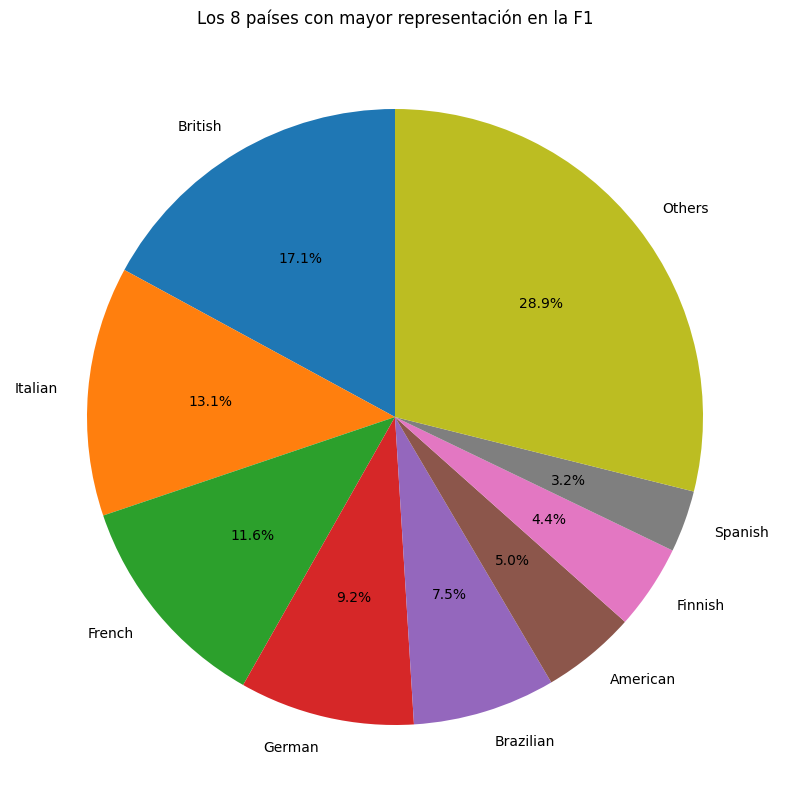

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Los 8 países con mayor representación en la F1')
plt.show()

Que unos países sean mas destacados que otros en la F1 para mi dependen de factores como la inversión economica de los países en el deporte, la falta de patrocinadores en países no tan desarrollados, ya que al ser un deporte tan costoso se necesitan patrocinadores para poder financiar lo necesario. Tambien las creencias limitantes que tienen los dueños de las escuderias donde piensan que los europeos o personas provenientes de paises desarrollados en su mayoria son los unicos buenos para este deporte.

### Ejercicio 5: Evolución del Número de Carreras por Año

Genera un gráfico de barras que muestre cómo ha evolucionado el número de carreras a lo largo de los años, utilizando la información de `races_df`.

**Pregunta para los estudiantes:** _¿Qué eventos o cambios en la industria (por ejemplo, crisis, cambios en el reglamento) podrían explicar las variaciones observadas a lo largo de la historia?_

Este ejercicio ayudará a vincular el análisis de datos con contextos históricos y comerciales.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# races_df should be race_df
race_df = pd.read_csv('races.csv')
races_per_year = race_df.groupby('year')['raceId'].count().reset_index()

In [ ]:
races_per_year

,year,raceId
0,1950,7
1,1951,8
2,1952,8
3,1953,9
4,1954,9
...,...,...
69,2019,21
70,2020,17
71,2021,22
72,2022,22


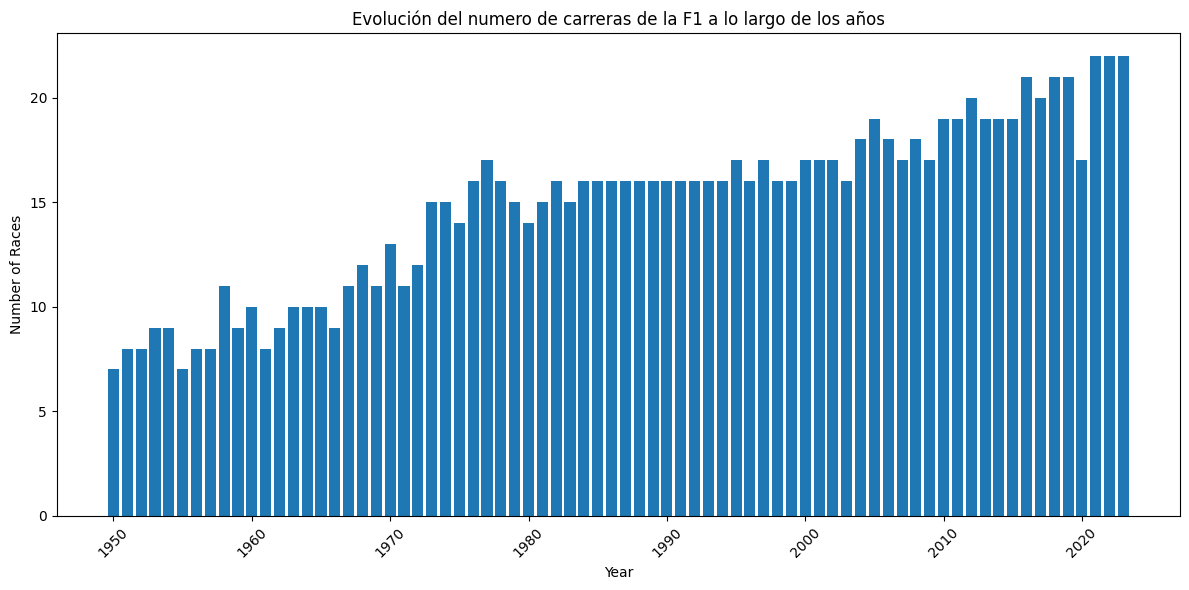

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(races_per_year['year'], races_per_year['raceId'])
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.title('Evolución del numero de carreras de la F1 a lo largo de los años')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

En los años con menor cantidad de carreras, pudo haber epidemias, pandemias, guerras, crisis economicas o en algunos casos cuando suecede un accidente muy grave que afecte la vida o genere la muerte de algun piloto, la F1 suele cancelar algunas de las carreras siguientes. Un ejemplo sobre las pandemias es que en el año 202 cuando sucedio la pandemia del COVID - 19, solo se realizaron 17 carreras cuando suelen ser 22 a 24 Grandes Premios o 30 carreras en total contando los formato sprints

## 5. Preguntas para el Análisis Conjunto y Debate en Clase

Para concluir la actividad, propón a los estudiantes debatir y responder a las siguientes preguntas:

1. **Integración y Calidad de Datos:** ¿Qué inconvenientes pueden surgir al unir tablas que tienen registros incompletos o duplicados? ¿Cómo solucionarlo?

La falta de información en campos clave o la presencia de duplicados puede generar pérdidas de datos relevantes o inflar métricas al unir tablas, afectando la precisión del análisis y el rendimiento de las consultas. Además, los registros incompletos pueden dejar valores faltantes que sesgan los resultados. Para evitarlo, es clave limpiar los datos antes de unirlos, imputando o eliminando valores faltantes y deduplicando registros para asegurar integridad y consistencia en el DataFrame resultante.

2. **Estrategias de Join:** ¿En qué casos es más adecuado usar un `inner join` y cuándo un `outer join` para evitar perder información relevante?

Un inner join devuelve solo los registros con coincidencias en ambas tablas, ideal cuando se necesita información presente en ambas fuentes, como resultados de carreras con datos completos de pilotos y circuitos.
Un outer join conserva todos los registros de al menos una tabla, incluso sin coincidencias. Sus variantes incluyen:
- Left join: mantiene todos los registros de la tabla izquierda.
- Right join: mantiene los de la derecha.
- Full join: conserva todos los de ambas tablas, rellenando faltantes con valores nulos.
Es útil, por ejemplo, para analizar todos los pilotos, incluso si no han competido.

3. **Insights Negocio:** Basándose en los resultados obtenidos (pilotos con más victorias/puntos, circuitos más usados, etc.), ¿qué estrategias de negocio o insights se podrían extraer para equipos o patrocinadores en la F1?

Es clave establecer alianzas duraderas con pilotos que consistentemente alcanzan el podio, ya que representan visibilidad global constante y proyectan una imagen de éxito que beneficia a las marcas patrocinadoras. Invertir en estos perfiles puede maximizar el retorno en visibilidad y posicionamiento.

Asimismo, los equipos deben priorizar recursos técnicos en circuitos emblemáticos como Silverstone, cuya relevancia histórica y exposición mediática pueden impactar tanto en la moral interna como en la percepción del público.

Además, los datos de desempeño permiten a patrocinadores identificar a los pilotos o equipos más destacados para enfocar mejor sus inversiones. Los equipos pueden detectar puntos débiles en ciertos circuitos y diseñar estrategias específicas, mientras que el análisis a largo plazo ayuda a descubrir talentos emergentes. También se pueden usar estos insights para campañas de marketing más efectivas y fortalecer la conexión con los fans.

4. **Análisis Temporal:** ¿Qué relación existe entre los cambios en el número de carreras por año y otros indicadores (como el número de pilotos, eventos destacados, etc.)?

El aumento en el número de carreras en la F1 no solo genera más oportunidades para los pilotos y más eventos clave durante el año, sino que también puede incrementar la audiencia total y atraer mayor inversión de patrocinadores. Sin embargo, esta expansión no es unilateral: el creciente interés del público, la estabilidad geopolítica, y la buena salud económica global también impulsan la demanda de más Grandes Premios, reflejando la globalización del deporte.

Factores como la introducción de nuevas tecnologías, cambios reglamentarios, y la disponibilidad de circuitos adecuados también influyen directamente en la posibilidad de ampliar el calendario. Al mismo tiempo, restricciones como crisis económicas, preocupaciones por seguridad o caídas en la popularidad del deporte pueden limitar esa expansión. Mostrando cómo evoluciona el deporte y su alcance en nuevas audiencias y mercados.



Estas preguntas tienen el objetivo de invitar a un análisis integral de los datos, combinando la técnica de joins con la interpretación y contextualización de los resultados.

## 6. Conclusión

Este ejercicio integrador ha permitido utilizar joins para combinar distintos orígenes de datos y explorar de manera conjunta información esencial de la Fórmula 1. Se ha trabajado en:

- La identificación de claves y la integración de múltiples datasets.
- La generación de indicadores y visualizaciones útiles para responder preguntas de negocio.
- El análisis crítico y debate sobre la calidad de los datos y la metodología de integración.

Utiliza este notebook como una herramienta para profundizar en la recolección y exploración de datos, incentivando a los estudiantes a buscar conexiones entre la teoría de joins y su aplicación en casos reales.